Importing Packages

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

Global Variables

In [2]:
# the list of "a" contains the different vector list file names
a = ['a0_a55'] #make a separate f(x) that reads the files
file = []
f = []
frames = 10000
max_tau = 500
x_max = max_tau/100
# the list of "a" contains the different vector list file names

file = "v_list_a0_55.txt"
#open the file
#vector list
sv = []
#mean y value list 
y_mean = []
y_sd = []
y_C99 = []
#execute the functions
df_y = pd.DataFrame({})

Functions

In [3]:
def read_data(): #note that "f" is defined previously as 
	#open the file
	f = open(file)
	reader = csv.reader(f,delimiter=' ',quoting=csv.QUOTE_NONNUMERIC) # change contents to floats, floats needed to use dot product function later on. 
	next(reader) #skip headers
	
	for row in reader: # each row is a list
		sv.append(row) #write each row to the sv array

In [4]:
def autoc():#read the file, delimiter ' ' indicates spaces separate columns

	##rotational autocorrelation function is C(tau) = <u(t).u(t+tau)>
	for tau in range (0, max_tau, 1):
		y = []
		for t in range (0, frames-tau, 1):
			C = (np.dot(sv[t], sv[t+tau]))
			y.append(C)
		y_mean.append(np.mean(y)) #the y_mean is the y value used for graphing later on
		y_sd.append(np.std(y)/np.sqrt((frames-tau)/300))
		# y_C99.append(st.norm.interval(alpha=0.99, loc=np.mean(y), scale=st.sem(y)))
		### calculate error bar for y values
		### function parameters and function return values

In [13]:
def autoc_graph():
	#x axis
	# x = list(range(0, max_tau))
	x = np.linspace(0,x_max,max_tau)
	yerr = y_sd
	# plotting the points
	plt.plot(x, y_mean)
	plt.errorbar(x, y_mean, yerr=yerr, color='steelblue')

	# # naming the x axis
	# plt.xlabel('tau')
	plt.xlabel('time (ns)')

	# # naming the y axis
	plt.ylabel('autocorrelation')

	# # giving a title to my graph
	plt.title('t3q Rotational Autocorrelation: a0_55')

	# # function to show the plot
	# plt.savefig('a0_55_C99.png', bbox_inches='tight')
	# plt.savefig('a0_55_C99.pdf', bbox_inches='tight')
	plt.show()

Executing Functions

In [6]:
read_data()
autoc()
# autoc_graph()

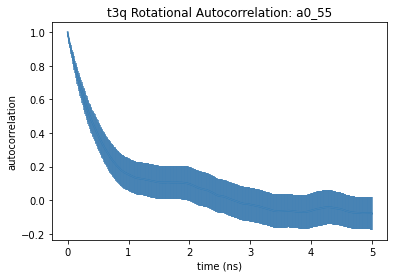

In [14]:
autoc_graph()